In [2]:
# import library 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.model_selection import train_test_split

In [3]:
loan = pd.read_csv('loan_data_2007_2014.csv')
copy = loan.copy()
copy.info()

C:\Users\USER\AppData\Local\Temp\ipykernel_12320\2489082156.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan_data_2007_2014.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# melakukan drop kolom 
copy.drop(['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
           'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m', 'max_bal_bc',
           'all_util', 'inq_fi','total_cu_tl','inq_last_12m','Unnamed: 0','id','member_id','desc','mths_since_last_delinq',
           'mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','url'], axis=1, inplace=True)

In [101]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

In [102]:
# memeriksa missing value
copy.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                  

In [103]:
modus = copy['tot_coll_amt'].mode()[0]
copy['acc_now_delinq'].fillna(modus, inplace = True)
copy['collections_12_mths_ex_med'].fillna(modus, inplace=True)
copy['tot_coll_amt'].fillna(modus, inplace=True)

In [104]:
modus = copy['delinq_2yrs'].mode()[0]
copy['delinq_2yrs'].fillna(modus,inplace=True)

In [105]:
mean= copy['tot_cur_bal'].mean()
copy['tot_cur_bal'].fillna(mean, inplace = True)
copy['total_rev_hi_lim'].fillna(mean, inplace= True)

In [106]:
copy['total_acc'].fillna(mean, inplace=True)

In [107]:
copy['revol_util'].fillna(mean, inplace =True)

In [108]:
copy['inq_last_6mths'].fillna(modus, inplace=True)

In [109]:
median = copy['pub_rec'].median()
median1 =copy['open_acc'].median()
copy['pub_rec'].fillna(median, inplace=True)
copy['open_acc'].fillna(median, inplace=True)

In [110]:
copy['annual_inc'].fillna(median, inplace=True)

In [111]:
copy['term'] = copy['term'].str.replace(' months','')

In [112]:
# merubah type data
copy['term'] = copy['term'].astype(int)

In [113]:
# menghilangkan months pada kolom term
copy['emp_length'] = copy['emp_length'].str.extract('(\d+)')

In [114]:
copy['emp_length'].fillna(0, inplace=True)
copy['emp_length'] = copy['emp_length'].astype(int)
copy['emp_length'] = copy['emp_length'].astype(float).astype(int)

In [115]:
# mengambil bulannya saja pada kolom issue_d
copy['priode_pinjaman'] = copy['issue_d'].str.extract('([a-zA-Z]+)', expand=False)

In [116]:
copy['emp_length'].fillna(median, inplace=True)

In [77]:
# memperbaikin missing value pada kolom title
copy.dropna(subset=['title'], inplace=True)

In [78]:
# memperbaikin missing value pada kolom emp_title
copy.dropna(subset=['emp_title'],inplace=True)

In [79]:
# menghilangkan angka pada kolom-kolom tanggal 
copy['Earliest_cr_line'] = copy['earliest_cr_line'].str.extract('([a-zA-Z]+)', expand=False)
copy['Last_pymnt_d'] = copy['last_pymnt_d'].str.extract('([a-zA-Z]+)', expand=False)
copy['Last_credit_pull_d'] = copy['last_credit_pull_d'].str.extract('([a-zA-Z]+)', expand=False)

In [80]:
copy.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line               17
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
out_prncp     

In [81]:
# mendrop kolom yang sudah di perbaiki
copy.drop(['earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)

In [82]:
copy.dropna(subset=['Earliest_cr_line','Last_pymnt_d','Last_credit_pull_d'],inplace=True)

In [83]:
copy[['Earliest_cr_line','Last_pymnt_d','Last_credit_pull_d']].sample(10)

,Earliest_cr_line,Last_pymnt_d,Last_credit_pull_d
121764,Oct,Jan,Jan
395353,Jun,Sep,Jan
187710,Oct,Nov,Nov
194286,Jul,Oct,Oct
64611,Nov,May,Jan
281401,Aug,Jan,Jan
140218,Nov,May,Jan
43553,Aug,Jan,Jan
69822,Sep,Jan,Jan
175110,Jun,Sep,Jan


In [98]:
copy.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Earliest_cr_line,Last_pymnt_d,Last_credit_pull_d
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,0.0,1,INDIVIDUAL,0.0,0.0,138801.713385,138801.713385,Apr,Apr,Sep
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,0.0,1,INDIVIDUAL,0.0,0.0,138801.713385,138801.713385,Feb,Jan,Jan
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,...,0.0,1,INDIVIDUAL,0.0,0.0,138801.713385,138801.713385,Jan,Jan,Jan
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,0.0,1,INDIVIDUAL,0.0,0.0,138801.713385,138801.713385,Nov,Jan,Sep
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,0.0,1,INDIVIDUAL,0.0,0.0,138801.713385,138801.713385,Jul,Jan,Jan


In [ ]:
# untuk melakukan save
df.to_csv('VIX_IDX_Revisi.csv', index=False)

Text(0.5, 0, 'Loan Amnt')

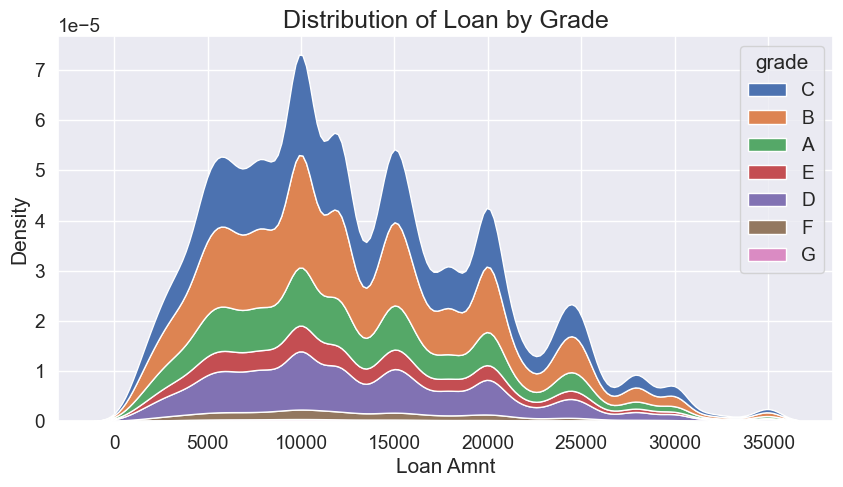

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))

sns.kdeplot(data = copy, x = df['loan_amnt'], alpha = 1, multiple = 'stack', hue = 'grade')
ax.set_title('Distribution of Loan by Grade', fontsize = 18)
ax.set_xlabel('Loan Amnt')

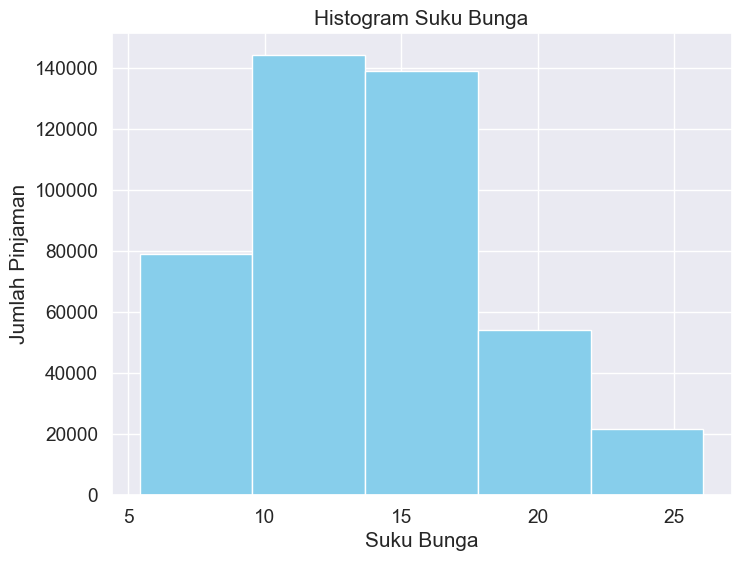

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(copy['int_rate'], bins=5, color='skyblue')
plt.xlabel('Suku Bunga')
plt.ylabel('Jumlah Pinjaman')
plt.title('Histogram Suku Bunga')
plt.show()

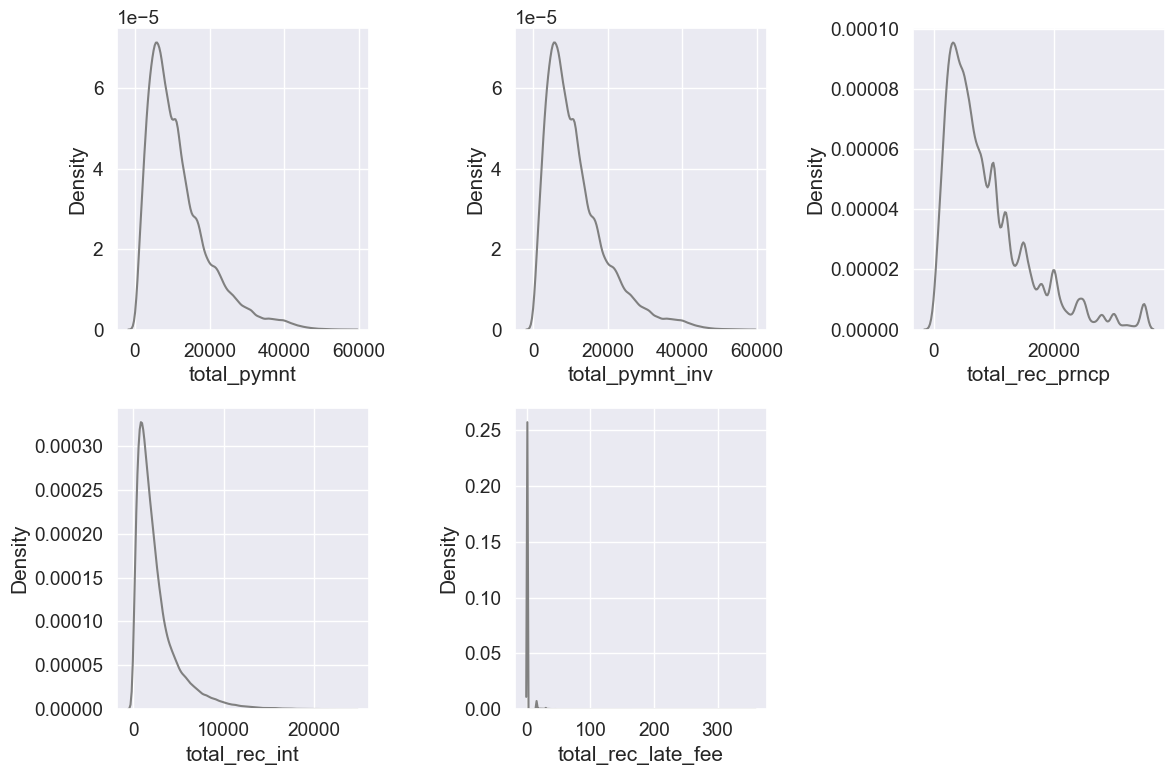

In [86]:
ab=['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee']
plt.figure(figsize=(12,8))
for i in range(len(ab)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=copy[ab[i]],color='grey')
    plt.xlabel(ab[i])
    plt.tight_layout()

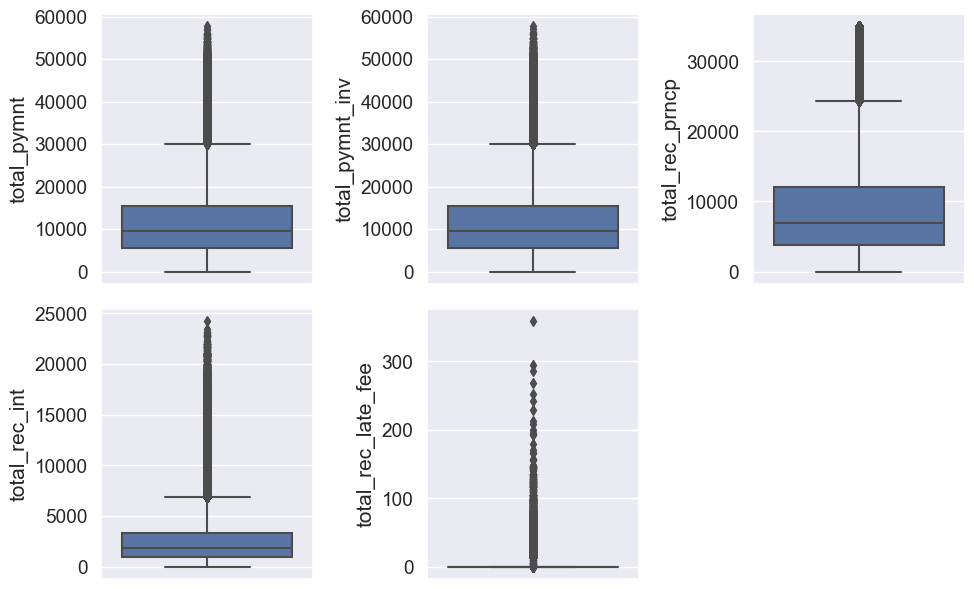

In [87]:
plt.figure(figsize=(10,15))
for i in range(0, len(ab)):
    plt.subplot(len(ab),3, i+1)
    sns.boxplot(y = copy[ab[i]], orient='v')
    plt.tight_layout()

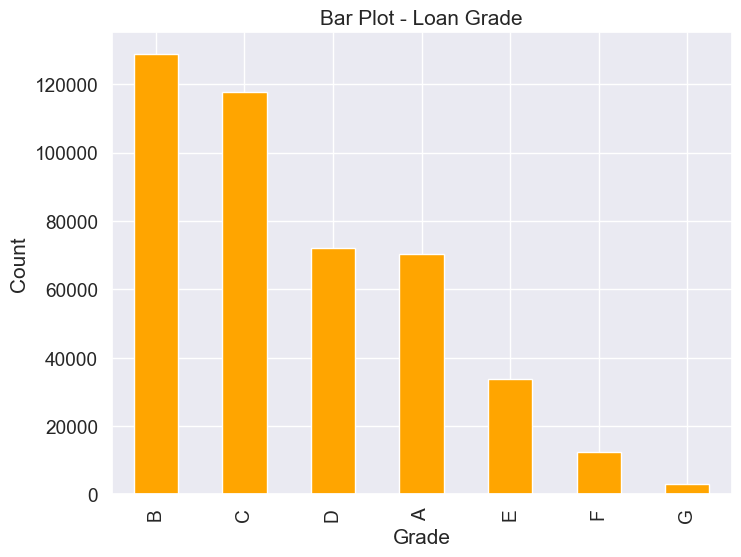

In [88]:
plt.figure(figsize=(8, 6))
copy['grade'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Bar Plot - Loan Grade')
plt.show()

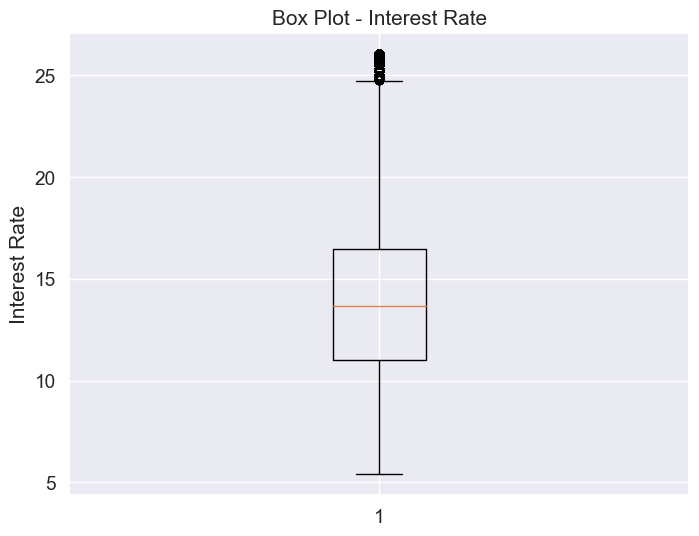

In [90]:
plt.figure(figsize=(8, 6))
plt.boxplot(copy['int_rate'])
plt.ylabel('Interest Rate')
plt.title('Box Plot - Interest Rate')
plt.show()

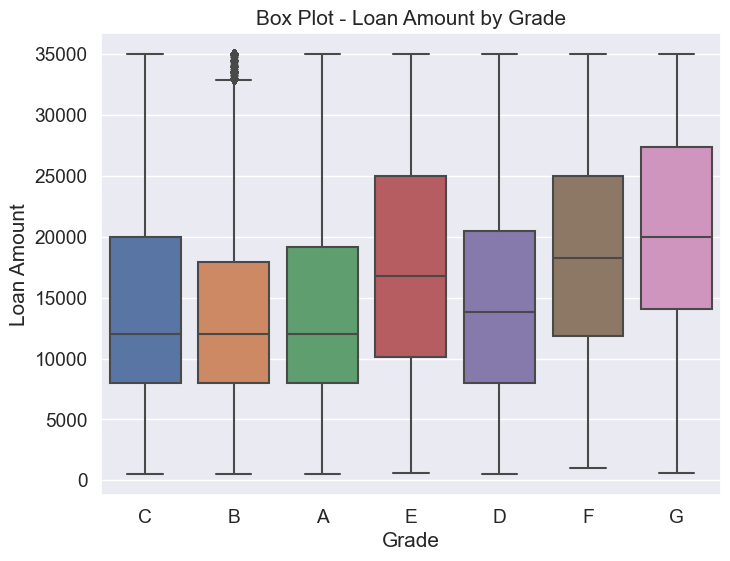

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade', y='loan_amnt', data=copy)
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Box Plot - Loan Amount by Grade')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_6424\3719080911.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_labels)


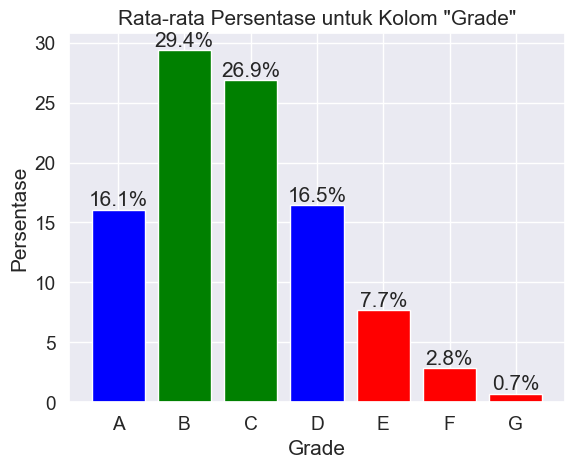

In [92]:
import matplotlib.pyplot as plt

grade_counts = copy['grade'].value_counts().sort_index()

# Menghitung persentase rata-rata untuk setiap nilai
grade_percentages = (grade_counts / len(copy)) * 100

# Membuat visualisasi
fig, ax = plt.subplots()

# Mengatur warna batang berdasarkan tingkat persentase
colors = ['red' if p < 10 else 'blue' if p < 20 else 'green' for p in grade_percentages]
ax.bar(grade_percentages.index, grade_percentages, color=colors)

plt.xlabel('Grade')
plt.ylabel('Persentase')
plt.title('Rata-rata Persentase untuk Kolom "Grade"')

# Menambahkan angka di atas batang
for i, v in enumerate(grade_percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Mengatur label huruf abjad
custom_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
ax.set_xticklabels(custom_labels)

plt.show()

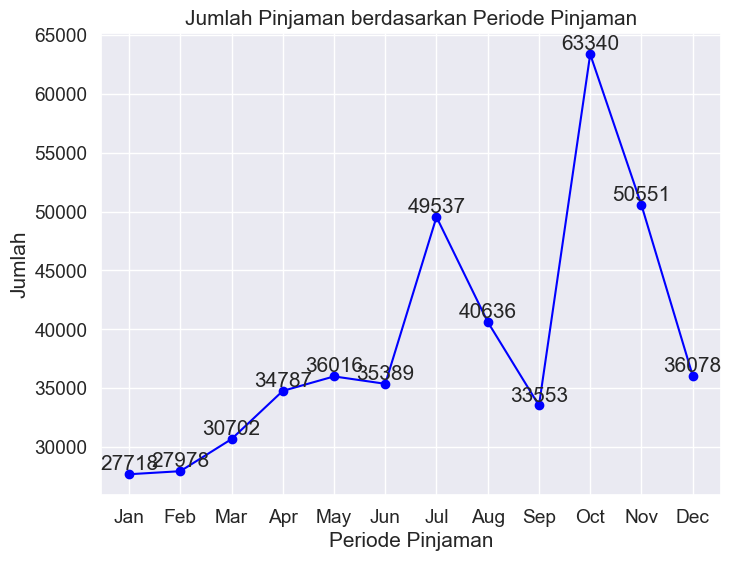

In [117]:
import calendar
fig, ax = plt.subplots(figsize=(8, 6))

# Menghitung jumlah kemunculan setiap nilai priode_pinjaman
loan_counts = copy['priode_pinjaman'].value_counts()

# Mengurutkan indeks berdasarkan urutan bulan
sorted_months = sorted(loan_counts.index, key=lambda x: list(calendar.month_abbr).index(x))

# Membuat visualisasi grafik
ax.plot(sorted_months, loan_counts[sorted_months].values, color='blue', marker='o')

plt.xlabel('Periode Pinjaman')
plt.ylabel('Jumlah')
plt.title('Jumlah Pinjaman berdasarkan Periode Pinjaman')

# Menambahkan label jumlah di atas titik
for i, v in enumerate(loan_counts[sorted_months].values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

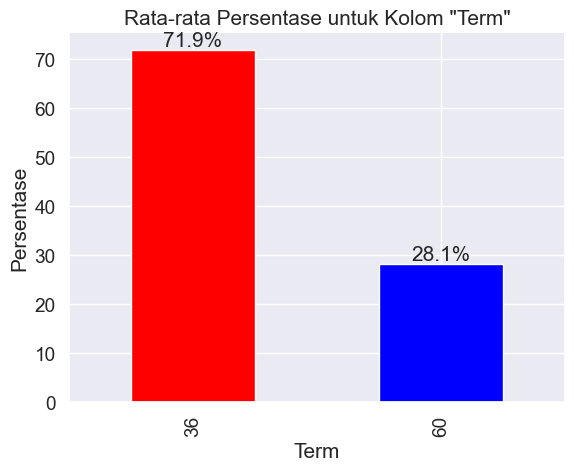

In [94]:
# Menghitung count untuk setiap nilai term
term_counts = copy['term'].value_counts()

# Menghitung persentase rata-rata untuk setiap nilai
term_percentages = (term_counts / len(copy)) * 100

# Membuat visualisasi
ax = term_percentages.plot(kind='bar', color=['red', 'blue'])

plt.xlabel('Term')
plt.ylabel('Persentase')
plt.title('Rata-rata Persentase untuk Kolom "Term"')

# Menambahkan angka di atas batang
for i, v in enumerate(term_percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

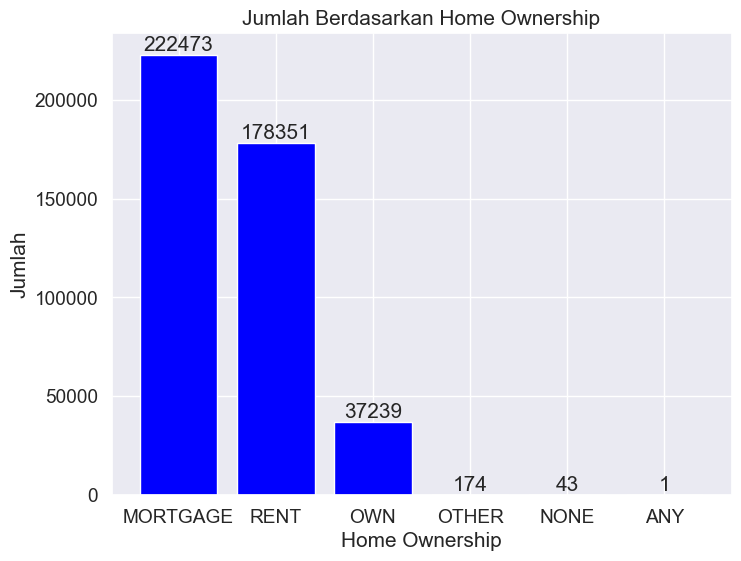

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))

# Menghitung jumlah kemunculan setiap nilai home_ownership
ownership_counts = copy['home_ownership'].value_counts()

# Mengurutkan indeks berdasarkan jumlah secara terbalik
sorted_ownership = sorted(ownership_counts.index, key=lambda x: ownership_counts[x], reverse=True)

# Membuat visualisasi bar chart
ax.bar(sorted_ownership, ownership_counts[sorted_ownership], color='blue')

plt.xlabel('Home Ownership')
plt.ylabel('Jumlah')
plt.title('Jumlah Berdasarkan Home Ownership')

# Menambahkan label jumlah di atas batang
for i, v in enumerate(ownership_counts[sorted_ownership]):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

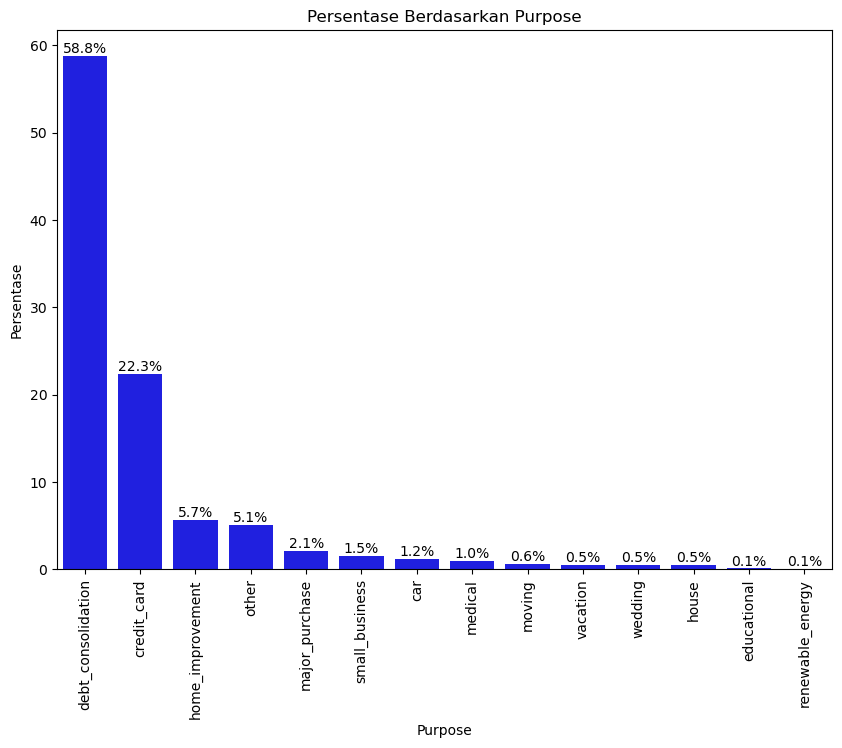

In [10]:
# Menghitung jumlah kemunculan setiap nilai purpose
purpose_counts = copy['purpose'].value_counts()

# Menghitung persentase untuk setiap nilai purpose
purpose_percentages = (purpose_counts / len(copy)) * 100

# Membuat visualisasi bar chart dengan seaborn
plt.figure(figsize=(10,7))
sns.barplot(x=purpose_percentages.index, y=purpose_percentages.values, color='blue')

plt.xlabel('Purpose')
plt.ylabel('Persentase')
plt.title('Persentase Berdasarkan Purpose')

# Menambahkan label persentase di atas batang
for i, v in enumerate(purpose_percentages.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.xticks(rotation='vertical')  # Mengubah orientasi label purpose menjadi vertical

plt.show()

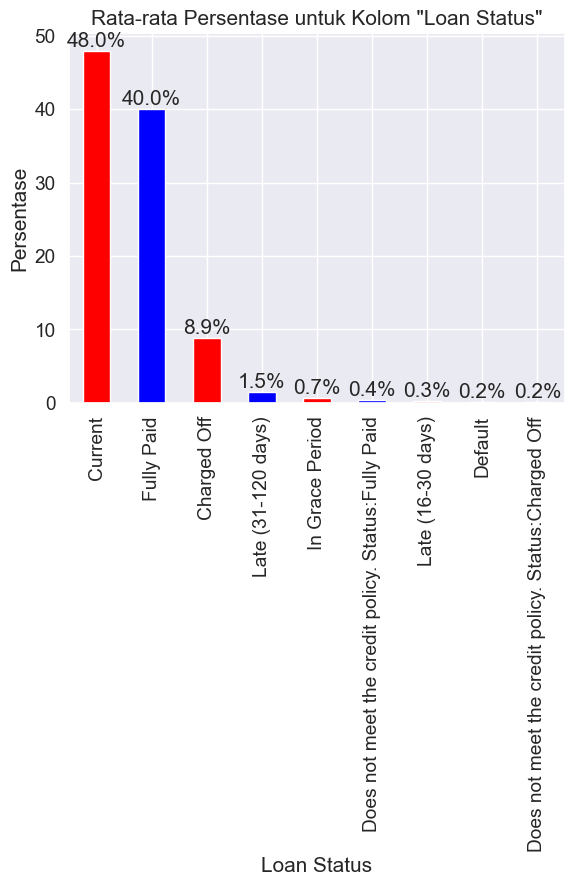

In [97]:
# Menghitung count untuk setiap nilai loan_status
loan_status_counts = copy['loan_status'].value_counts()

# Menghitung persentase rata-rata untuk setiap nilai
loan_status_percentages = (loan_status_counts / len(copy)) * 100

# Membuat visualisasi
ax = loan_status_percentages.plot(kind='bar', color=['red', 'blue'])

plt.xlabel('Loan Status')
plt.ylabel('Persentase')
plt.title('Rata-rata Persentase untuk Kolom "Loan Status"')

# Menambahkan angka di atas batang
for i, v in enumerate(loan_status_percentages):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

# Permodelan

In [2]:
# import dataset untuk permodelan
data =pd.read_csv('VIX_IDX_Revisi.csv')
original_feature = data.columns
print('Jumlah Kolom',len(original_feature))
print(data.head())

Jumlah Kolom 49
   loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       2500         2500           2500.0    60     15.27        59.83     C   
1      10000        10000          10000.0    36     13.49       339.31     C   
2       3000         3000           3000.0    60     12.69        67.79     B   
3       5000         5000           5000.0    36      7.90       156.46     A   
4       7000         7000           7000.0    60     15.96       170.08     C   

  sub_grade                  emp_title  emp_length  ... policy_code  \
0        C4                      Ryder           1  ...           1   
1        C1        AIR RESOURCES BOARD          10  ...           1   
2        B5   University Medical Group           1  ...           1   
3        A4       Veolia Transportaton           3  ...           1   
4        C5  Southern Star Photography           8  ...           1   

   application_type acc_now_delinq tot_coll_amt    tot_cur_bal  \
0   

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
data.head()

# Feature Selection

In [3]:
# melakukan drop pada kolom yang tidak di perlukan secara manual
data.drop(['funded_amnt','sub_grade','emp_title','home_ownership','purpose','title',
          'zip_code','addr_state','initial_list_status','policy_code','application_type','priode_pinjaman',
          'Earliest_cr_line','Last_pymnt_d','Last_credit_pull_d','pymnt_plan'], axis=1, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438281 entries, 0 to 438280
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   438281 non-null  int64  
 1   funded_amnt_inv             438281 non-null  float64
 2   term                        438281 non-null  int64  
 3   int_rate                    438281 non-null  float64
 4   installment                 438281 non-null  float64
 5   grade                       438281 non-null  object 
 6   emp_length                  438281 non-null  int64  
 7   annual_inc                  438281 non-null  float64
 8   verification_status         438281 non-null  object 
 9   loan_status                 438281 non-null  object 
 10  dti                         438281 non-null  float64
 11  delinq_2yrs                 438281 non-null  float64
 12  inq_last_6mths              438281 non-null  float64
 13  open_acc      

# Label Encoding

In [4]:
mapp_ver ={
     'Source Verified': 1, 
    'Not Verified': 0, 
    'Verified': 2
}
data['verification_status'] = data['verification_status'].map(mapp_ver)

In [5]:
mapping_loann ={
    'Charged Off': 0, 
    'Fully Paid' : 1, 
    'Current' : 2, 
    'Default' : 5,
    'Late (31-120 days)' : 4, 
    'In Grace Period' : 3, 
    'Late (16-30 days)' : 6,
    'Does not meet the credit policy. Status:Fully Paid' : 7,
    'Does not meet the credit policy. Status:Charged Off' : 8
}
data['loan_status'] =data['loan_status'].map(mapping_loann)

In [7]:
# melakukan label encod
mapping_grade ={
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7
}
data['grade'] = data['grade'].map(mapping_grade)

In [8]:
data['loan_status'].value_counts()

2    210228
1    175250
0     38896
4      6427
3      3013
7      1863
6      1130
5       777
8       697
Name: loan_status, dtype: int64

In [9]:
fil = (data['loan_status'] == 8 ) | (data['loan_status'] == 5 )
data.loc[fil, 'loan_status'] = 0
data['loan_status'].value_counts()

2    210228
1    175250
0     40370
4      6427
3      3013
7      1863
6      1130
Name: loan_status, dtype: int64

In [10]:
fill =(data['loan_status']==7)
data.loc[fill, 'loan_status']=1
data['loan_status'].value_counts()

2    210228
1    177113
0     40370
4      6427
3      3013
6      1130
Name: loan_status, dtype: int64

In [11]:
fill =(data['loan_status']==6) 
data.loc[fill, 'loan_status']=4
data['loan_status'].value_counts()

2    210228
1    177113
0     40370
4      7557
3      3013
Name: loan_status, dtype: int64

# Handle Outlier With Z-score

In [13]:
def count_outliers(column):
    if column.dtype.kind in ['i', 'f']:
        q1 = np.percentile(column, 25)
        q3 = np.percentile(column, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return len(outliers)
    else:
        return 0

def calculate_outlier_percentage(column):
    total_data = len(column)
    outliers = count_outliers(column)
    percentage = (outliers / total_data) * 100
    return percentage

outlier_counts = data.apply(count_outliers)
outlier_percentages = data.apply(calculate_outlier_percentage)

print("Jumlah Outlier:")
print(outlier_counts)
print("\nPersentase Outlier:")
print(outlier_percentages)


Jumlah Outlier:
loan_amnt                         0
funded_amnt_inv                   0
term                              0
int_rate                       4638
installment                   10867
grade                             0
emp_length                        0
annual_inc                    18021
verification_status               0
loan_status                    7557
dti                             124
delinq_2yrs                   78918
inq_last_6mths                34519
open_acc                      10080
pub_rec                       55454
revol_bal                     21440
revol_util                      304
total_acc                      8250
out_prncp                     20949
out_prncp_inv                 20985
total_pymnt                   17639
total_pymnt_inv               17747
total_rec_prncp               19851
total_rec_int                 29051
total_rec_late_fee            10001
recoveries                    22365
collection_recovery_fee       21303
last_pymnt_a

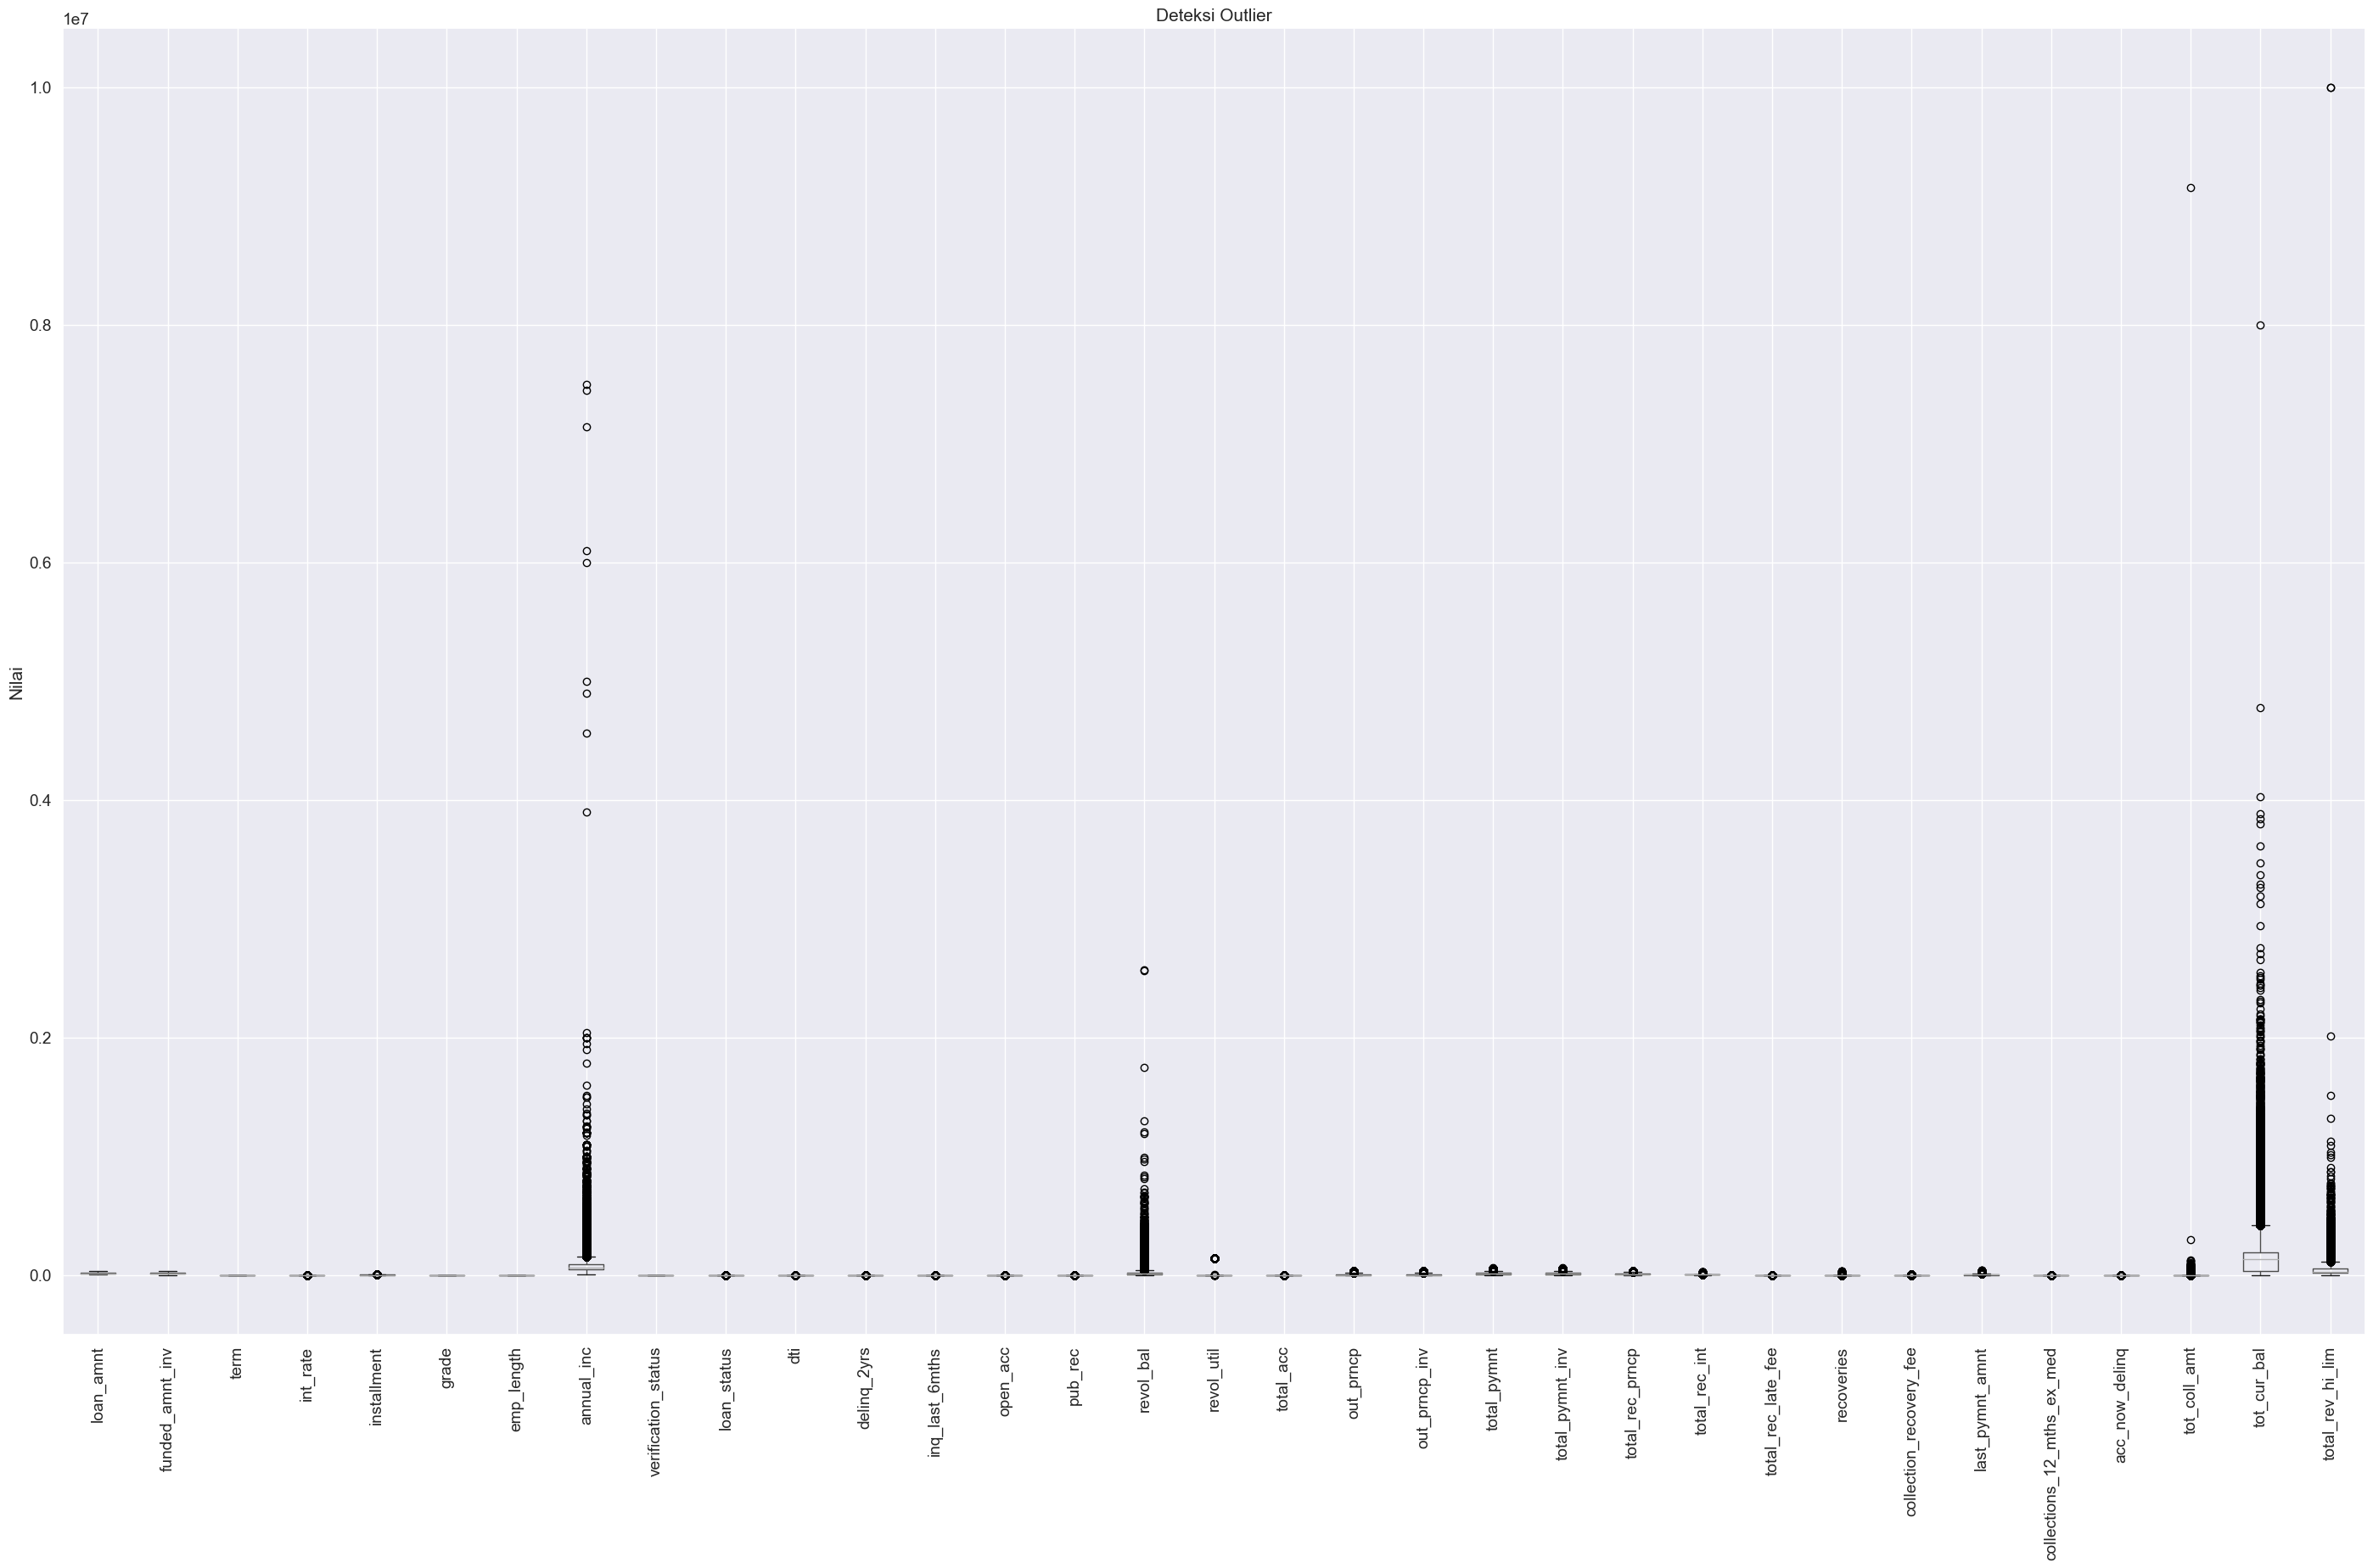

In [23]:
plt.figure(figsize=(35,20))
data.boxplot()
plt.title('Deteksi Outlier')
plt.ylabel('Nilai')
plt.xticks(rotation ='vertical')
plt.show()

In [16]:
cols = ['installment', 'int_rate', 'open_acc', 'total_acc', 'tot_cur_bal', 'last_pymnt_amnt', 'revol_bal',
        'annual_inc', 'out_prncp_inv', 'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_pymnt',
        'total_pymnt_inv']
z_scores = np.abs(stats.zscore(data[cols]))
                                     
filtered_entries = (z_scores < 3).all(axis=1)
handle_out=data[filtered_entries]
handle_out.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,...,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,390669.000000,3.906690e+05,390669.000000,3.906690e+05
mean,12970.490300,12877.148391,41.959132,13.566093,394.373902,2.735802,5.994576,67095.543253,0.943538,1.445136,...,2227.531131,0.600540,84.636242,8.737283,2571.197641,0.009130,0.003788,1.632538e+02,123206.707627,4.422334e+04
std,6909.855282,6918.617572,10.368615,4.217806,203.574641,1.271179,3.498136,32423.451372,0.816059,0.745407,...,1828.597625,4.736274,531.184115,81.844622,4224.922486,0.107044,0.067128,1.470200e+04,108473.811088,4.481604e+04
min,500.000000,0.000000,36.000000,5.420000,15.670000,1.000000,0.000000,1896.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,7800.000000,7600.000000,36.000000,10.640000,247.610000,2.000000,3.000000,45000.000000,0.000000,1.000000,...,920.190000,0.000000,0.000000,0.000000,301.670000,0.000000,0.000000,0.000000e+00,31712.000000,1.440000e+04
50%,12000.000000,12000.000000,36.000000,13.350000,359.890000,3.000000,6.000000,60000.000000,1.000000,2.000000,...,1706.770000,0.000000,0.000000,0.000000,501.970000,0.000000,0.000000,0.000000e+00,112629.000000,2.530000e+04
75%,18000.000000,17750.000000,36.000000,16.290000,512.180000,4.000000,10.000000,82000.000000,2.000000,2.000000,...,2955.970000,0.000000,0.000000,0.000000,2813.720000,0.000000,0.000000,0.000000e+00,167499.000000,4.990000e+04
max,35000.000000,35000.000000,60.000000,26.060000,1163.150000,7.000000,10.000000,239200.000000,2.000000,4.000000,...,10079.580000,294.680000,33520.270000,7002.190000,20023.030000,20.000000,5.000000,9.152545e+06,562919.000000,1.030500e+06


# Korelasi

In [19]:
handle_out.corr()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.992386,0.377907,0.066563,0.943655,0.061760,0.114150,0.393838,0.330080,0.078416,...,0.706334,0.032749,0.144191,0.097217,0.183542,-0.007626,0.001448,-0.001771,0.240246,0.031381
funded_amnt_inv,0.992386,1.000000,0.377172,0.069642,0.940522,0.057755,0.118268,0.390788,0.331087,0.089545,...,0.703119,0.026610,0.141395,0.093683,0.182523,-0.006530,0.002029,-0.001627,0.238002,0.004653
term,0.377907,0.377172,1.000000,0.410621,0.103048,0.420926,0.075045,0.059883,0.257940,0.075200,...,0.547373,0.007918,0.111615,0.069225,0.040600,0.002287,0.007019,-0.001212,0.100404,-0.011820
int_rate,0.066563,0.069642,0.410621,1.000000,0.051593,0.948873,0.020153,-0.131050,0.211061,-0.043984,...,0.443359,0.053150,0.141692,0.089503,0.014251,0.023089,0.028769,0.001671,-0.138983,-0.222847
installment,0.943655,0.940522,0.103048,0.051593,1.000000,0.037826,0.097555,0.383280,0.292731,0.051000,...,0.617771,0.040526,0.129460,0.088765,0.195711,-0.005719,0.003544,-0.001222,0.200563,0.010334
grade,0.061760,0.057755,0.420926,0.948873,0.037826,1.000000,0.008851,-0.122531,0.182177,-0.029958,...,0.404254,0.059255,0.135350,0.090783,-0.003507,0.025704,0.028558,0.001412,-0.123492,-0.162872
emp_length,0.114150,0.118268,0.075045,0.020153,0.097555,0.008851,1.000000,0.103074,0.069966,0.045540,...,0.098057,-0.014145,0.009051,0.007100,0.026732,0.000966,0.009800,-0.001228,0.098127,-0.047605
annual_inc,0.393838,0.390788,0.059883,-0.131050,0.383280,-0.122531,0.103074,1.000000,0.113025,0.040949,...,0.197278,0.011448,0.025940,0.018355,0.120000,0.001137,0.018637,0.003711,0.430210,0.083541
verification_status,0.330080,0.331087,0.257940,0.211061,0.292731,0.182177,0.069966,0.113025,1.000000,-0.006612,...,0.345073,0.017083,0.079901,0.049173,0.088363,0.016421,0.014839,0.002159,0.092162,-0.002913
loan_status,0.078416,0.089545,0.075200,-0.043984,0.051000,-0.029958,0.045540,0.040949,-0.006612,1.000000,...,0.175891,-0.036281,-0.308907,-0.206968,-0.303403,0.027980,0.016124,0.001551,-0.003935,-0.274800


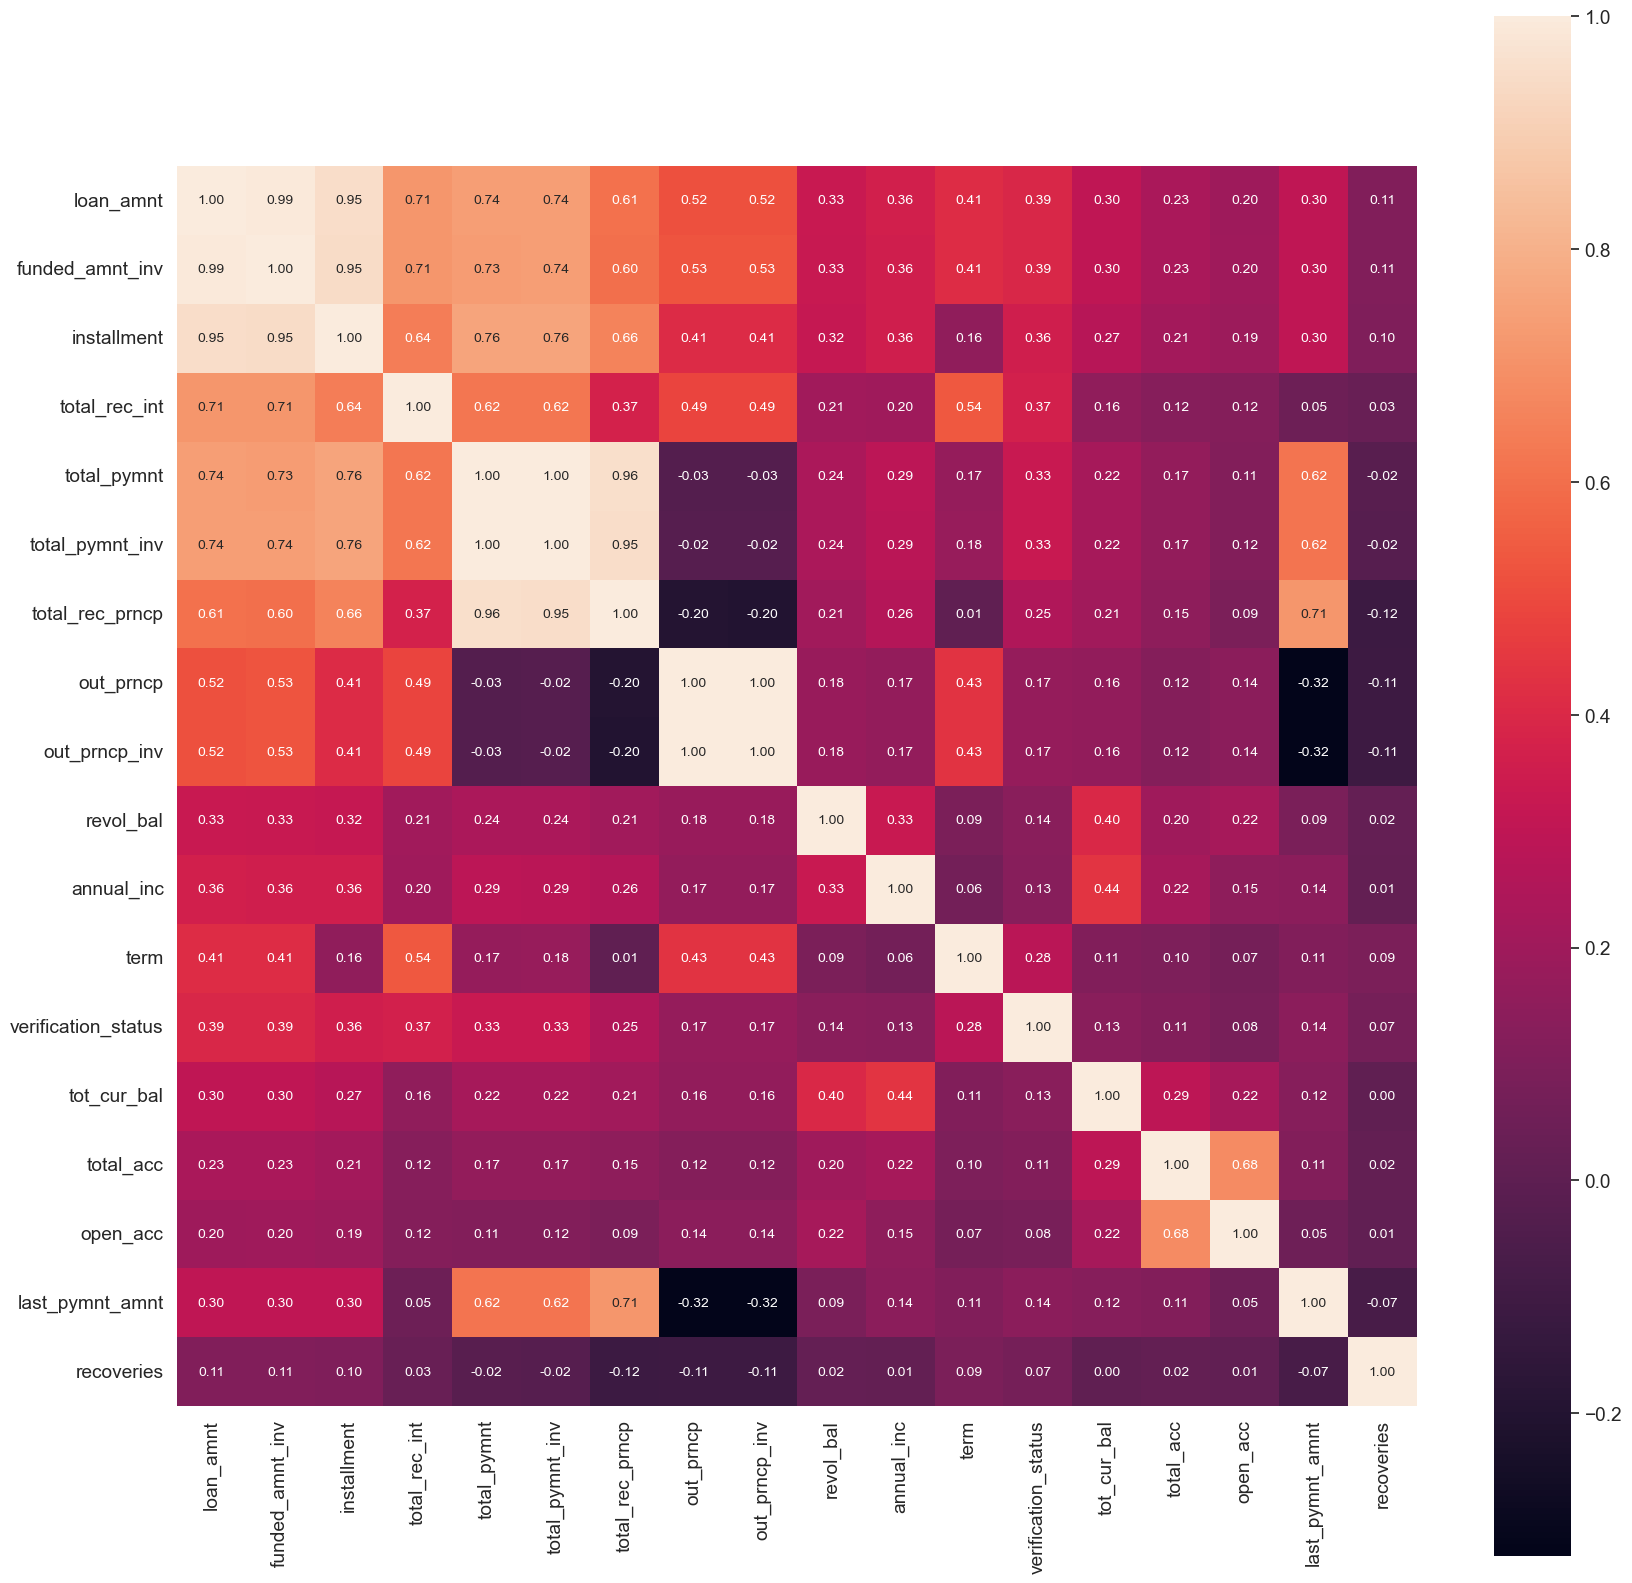

In [20]:
# mengambil 18 feature terbaik 
corrmat = handle_out.corr()
k = 18
cols = corrmat.nlargest(k, corrmat.columns).index
cm = np.corrcoef(data[cols].values.T)
# Membuat visulisasi 
sns.set(font_scale=1.25)
plt.subplots(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()


In [22]:
df = handle_out[['loan_amnt', 'installment','funded_amnt_inv','grade','int_rate','open_acc','total_acc','tot_cur_bal','last_pymnt_amnt','revol_bal',
                 'annual_inc','verification_status','term','out_prncp_inv','out_prncp','total_rec_prncp','total_rec_int',
                 'total_pymnt','total_pymnt_inv']].reset_index()
df.info()
df = df.drop('index', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390669 entries, 0 to 390668
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                390669 non-null  int64  
 1   loan_amnt            390669 non-null  int64  
 2   installment          390669 non-null  float64
 3   funded_amnt_inv      390669 non-null  float64
 4   grade                390669 non-null  int64  
 5   int_rate             390669 non-null  float64
 6   open_acc             390669 non-null  float64
 7   total_acc            390669 non-null  float64
 8   tot_cur_bal          390669 non-null  float64
 9   last_pymnt_amnt      390669 non-null  float64
 10  revol_bal            390669 non-null  int64  
 11  annual_inc           390669 non-null  float64
 12  verification_status  390669 non-null  int64  
 13  term                 390669 non-null  int64  
 14  out_prncp_inv        390669 non-null  float64
 15  out_prncp        

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390669 entries, 0 to 390668
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            390669 non-null  int64  
 1   installment          390669 non-null  float64
 2   funded_amnt_inv      390669 non-null  float64
 3   grade                390669 non-null  int64  
 4   int_rate             390669 non-null  float64
 5   open_acc             390669 non-null  float64
 6   total_acc            390669 non-null  float64
 7   tot_cur_bal          390669 non-null  float64
 8   last_pymnt_amnt      390669 non-null  float64
 9   revol_bal            390669 non-null  int64  
 10  annual_inc           390669 non-null  float64
 11  verification_status  390669 non-null  int64  
 12  term                 390669 non-null  int64  
 13  out_prncp_inv        390669 non-null  float64
 14  out_prncp            390669 non-null  float64
 15  total_rec_prncp  

# Standarisasi

In [28]:
df_s = df
scalar=StandardScaler()
scaler_df = scalar.fit_transform(df_s)
scaler_df = pd.DataFrame(scaler_df,columns=df_s.columns)
scaler_df.head()

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv
0,-1.515300,-1.643350,-1.499889,0.207837,0.403980,-1.745123,-1.880138,0.143768,-0.580257,-1.108438,-1.144098,0.069189,1.739952,-0.713968,-0.714012,-1.306465,-0.980185,-1.411893,-1.403575
1,-0.429892,-0.270485,-0.415856,0.207837,-0.018041,-0.188901,1.209354,0.143768,-0.523967,-0.752008,-0.551933,0.069189,-0.574729,-0.713968,-0.714012,0.347105,-0.009954,0.290985,0.302027
2,-1.442939,-1.604249,-1.427621,-0.578835,-0.207713,0.922687,1.302975,0.143768,-0.592534,1.269834,0.397998,0.069189,1.739952,-0.574690,-0.574776,-0.998634,-0.666337,-1.072845,-1.063984
3,-1.153497,-1.168683,-1.138545,-1.365507,-1.343376,-0.411218,-1.131170,0.143768,-0.570465,-0.536472,-0.959046,0.069189,-0.574729,-0.713968,-0.714012,-0.519225,-0.872884,-0.710153,-0.700712
4,-0.864055,-1.101779,-0.849470,0.207837,0.567572,-0.855853,-1.224791,0.143768,-0.568323,0.353284,-0.619662,-1.156214,1.739952,-0.370875,-0.371024,-0.500018,0.436651,-0.329813,-0.319763


In [30]:
pca = PCA (n_components=2)
principal_components = pca.fit_transform(scaler_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-4.078247,1.168089
1,-0.594365,-0.864830
2,-2.226403,0.624627
3,-3.054320,-1.026103
4,-1.580800,0.917196
...,...,...
390664,-0.670177,-0.655934
390665,0.546885,-0.013577
390666,2.583998,2.466530
390667,1.304903,1.927628


# Elbow Method

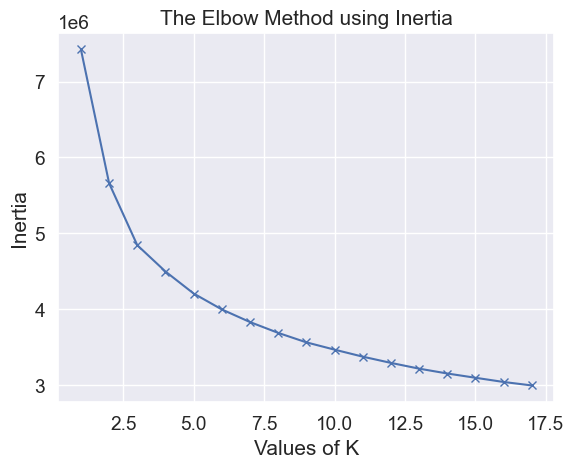

In [31]:
inertia = []
range_val = range(1, 18)
random_state = 42  # Nilai random_state yang digunakan
for i in range_val:
    kmean = KMeans(n_clusters=i, random_state=random_state)  # Menambahkan random_state
    kmean.fit_predict(pd.DataFrame(scaler_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# KMeans

In [32]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit_predict(scaler_df) 
pca_df_kmeans= pd.concat([pca_df, pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.sample(10)

,PCA1,PCA2,cluster
69298,-1.362820,-0.544393,1
150212,0.988366,-3.668169,2
38865,-1.959877,-0.246117,1
67952,2.895664,-3.612206,2
50746,-0.621122,-0.771879,1
96033,3.783480,4.177655,0
275739,1.566884,3.436504,0
181815,2.967093,-1.242723,2
14177,-0.591604,-0.667901,1
167031,3.981797,1.403688,0


## Visualisasi Df Cluster

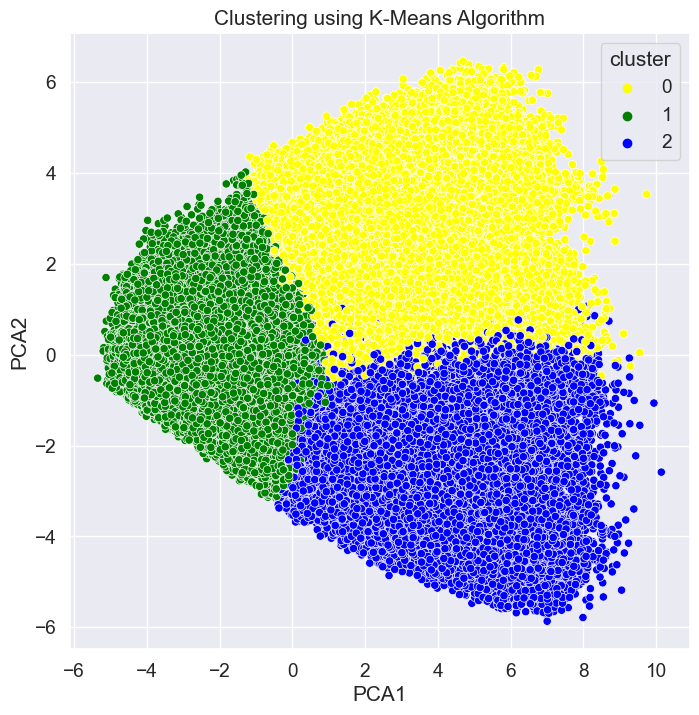

In [33]:
plt.figure(figsize =(8,8))
ax= sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data= pca_df_kmeans, palette=['yellow','green','blue'])
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390669 entries, 0 to 390668
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            390669 non-null  int64  
 1   installment          390669 non-null  float64
 2   funded_amnt_inv      390669 non-null  float64
 3   grade                390669 non-null  int64  
 4   int_rate             390669 non-null  float64
 5   open_acc             390669 non-null  float64
 6   total_acc            390669 non-null  float64
 7   tot_cur_bal          390669 non-null  float64
 8   last_pymnt_amnt      390669 non-null  float64
 9   revol_bal            390669 non-null  int64  
 10  annual_inc           390669 non-null  float64
 11  verification_status  390669 non-null  int64  
 12  term                 390669 non-null  int64  
 13  out_prncp_inv        390669 non-null  float64
 14  out_prncp            390669 non-null  float64
 15  total_rec_prncp  

In [36]:
cluster_center = pd.DataFrame(data = kmeans_model.cluster_centers_,columns=[scaler_df.columns])
cluster_center = scalar.inverse_transform(cluster_center)
cluster_center = pd.DataFrame(data =cluster_center, columns=[df.columns])
cluster_center

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv
0,20050.623339,552.496139,20020.698977,3.332120,15.434835,12.109913,26.868273,154311.403471,557.370483,19060.312085,78756.961526,1.267510,52.560971,11923.718450,11927.861657,6173.780142,4088.381989,10429.259205,10419.327554
1,8277.752264,268.774455,8186.029856,2.563608,12.969321,10.082850,22.006010,99968.026901,1554.501782,10265.390323,57206.173232,0.711486,37.922639,1958.282340,1958.955083,5422.342131,1220.445200,6708.889360,6636.647718
2,18273.030377,569.623779,18107.895145,2.572887,13.211730,11.606481,26.797275,153668.093408,7488.754847,18108.437705,81732.096152,1.233507,41.727303,832.513171,833.204850,16967.994266,3002.799596,20021.360228,19895.756941


In [38]:
cluster_df = pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
cluster_df.head()

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv,cluster
0,2500,59.83,2500.0,3,15.27,3.0,4.0,138801.713385,119.66,1687,30000.0,1,60,0.00,0.00,456.46,435.17,1008.710000,1008.71,1
1,10000,339.31,10000.0,3,13.49,10.0,37.0,138801.713385,357.48,5598,49200.0,1,36,0.00,0.00,10000.00,2209.33,12226.302210,12226.30,1
2,3000,67.79,3000.0,2,12.69,15.0,38.0,138801.713385,67.79,27783,80000.0,1,60,766.90,766.90,2233.10,1009.07,3242.170000,3242.17,1
3,5000,156.46,5000.0,1,7.90,9.0,12.0,138801.713385,161.03,7963,36000.0,1,36,0.00,0.00,5000.00,631.38,5631.377753,5631.38,1
4,7000,170.08,7000.0,3,15.96,7.0,11.0,138801.713385,170.08,17726,47004.0,0,60,1889.15,1889.15,5110.85,3025.99,8136.840000,8136.84,1


In [39]:
# cek cluster 0
cluster_df[cluster_df['cluster']==0]. head()

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv,cluster
48,21000,555.33,20975.0,5,19.91,7.0,14.0,138801.713385,555.33,19448,50000.0,2,60,0.00,0.00,8990.81,9328.33,18319.14,18297.35,0
78,14000,349.98,13975.0,4,17.27,5.0,10.0,138801.713385,349.98,6986,28000.0,2,60,3835.51,3842.41,10157.60,6619.44,16777.04,16747.17,0
87,15300,423.10,15275.0,6,22.06,14.0,27.0,138801.713385,423.10,26524,85000.0,2,60,4516.51,4523.91,10776.09,9519.71,20295.80,20262.65,0
89,17500,437.47,17500.0,4,17.27,13.0,26.0,138801.713385,437.47,20129,45000.0,0,60,0.00,0.00,3077.85,3473.25,10037.10,10037.10,0
93,16000,402.65,16000.0,4,17.58,8.0,16.0,138801.713385,402.65,21166,65000.0,0,60,4415.97,4415.97,11584.03,7713.92,19297.95,19297.95,0


In [40]:
# cluster 1
cluster_df[cluster_df['cluster']==1].head()

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv,cluster
0,2500,59.83,2500.0,3,15.27,3.0,4.0,138801.713385,119.66,1687,30000.0,1,60,0.00,0.00,456.46,435.17,1008.710000,1008.71,1
1,10000,339.31,10000.0,3,13.49,10.0,37.0,138801.713385,357.48,5598,49200.0,1,36,0.00,0.00,10000.00,2209.33,12226.302210,12226.30,1
2,3000,67.79,3000.0,2,12.69,15.0,38.0,138801.713385,67.79,27783,80000.0,1,60,766.90,766.90,2233.10,1009.07,3242.170000,3242.17,1
3,5000,156.46,5000.0,1,7.90,9.0,12.0,138801.713385,161.03,7963,36000.0,1,36,0.00,0.00,5000.00,631.38,5631.377753,5631.38,1
4,7000,170.08,7000.0,3,15.96,7.0,11.0,138801.713385,170.08,17726,47004.0,0,60,1889.15,1889.15,5110.85,3025.99,8136.840000,8136.84,1


In [41]:
# cluster2
cluster_df[cluster_df['cluster']==2].head()

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv,cluster
8,12000,402.54,12000.00000,2,12.69,12.0,34.0,138801.713385,6315.30,23336,75000.0,1,36,0.0,0.0,12000.00,1943.08,13943.08000,13943.08,2
17,20250,484.63,19142.16108,3,15.27,8.0,22.0,138801.713385,6024.09,17813,43370.0,2,60,0.0,0.0,20250.00,7413.04,27663.04267,25417.68,2
18,21000,701.73,21000.00000,2,12.42,7.0,38.0,138801.713385,701.73,32135,105000.0,2,36,0.0,0.0,10694.96,3330.44,14025.40000,14025.40,2
22,15000,483.38,15000.00000,2,9.91,8.0,31.0,138801.713385,2447.05,13707,92000.0,2,36,0.0,0.0,15000.00,823.48,15823.48000,15823.48,2
31,15000,469.36,15000.00000,1,7.90,7.0,27.0,138801.713385,5872.80,6704,45000.0,2,36,0.0,0.0,15000.00,1662.60,16662.60000,16662.60,2


<AxesSubplot:xlabel='cluster', ylabel='count'>

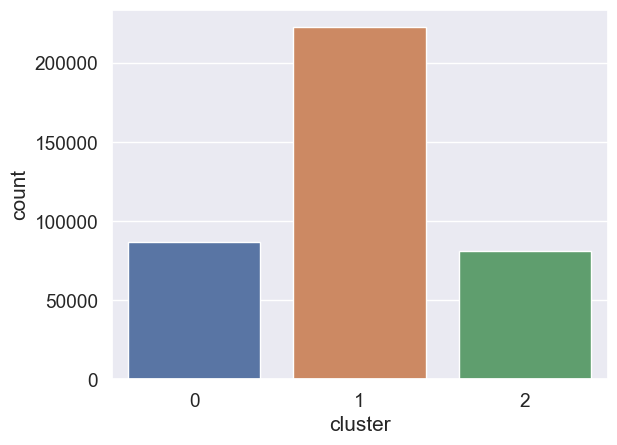

In [42]:
sns.countplot(x='cluster',data= cluster_df)

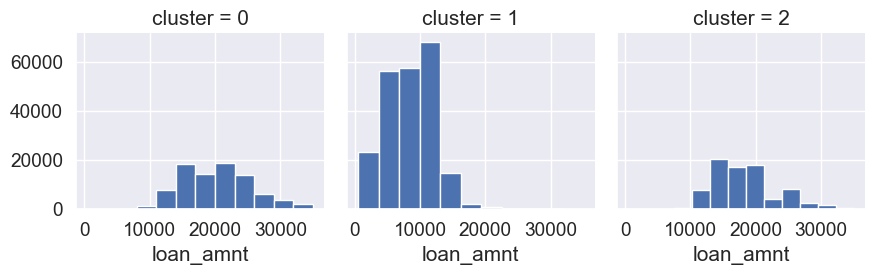

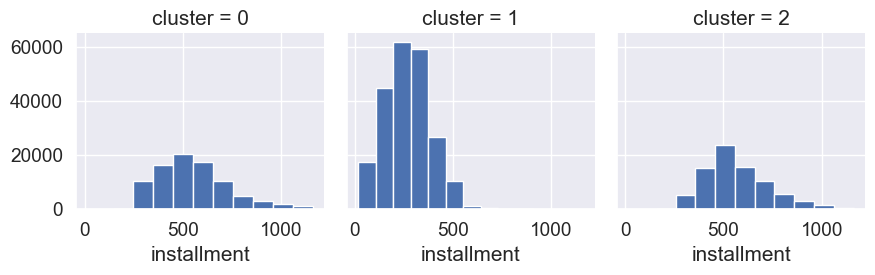

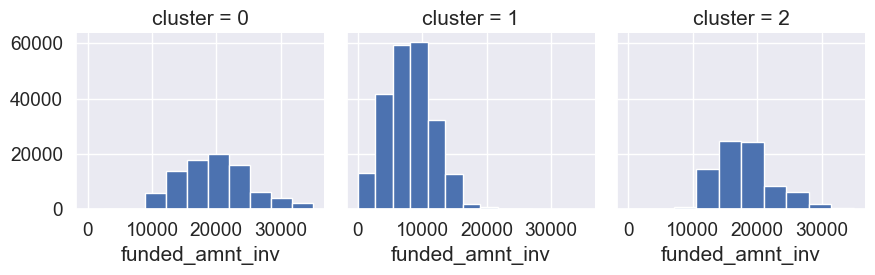

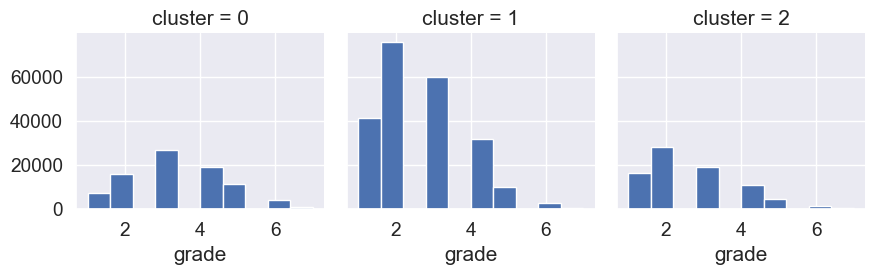

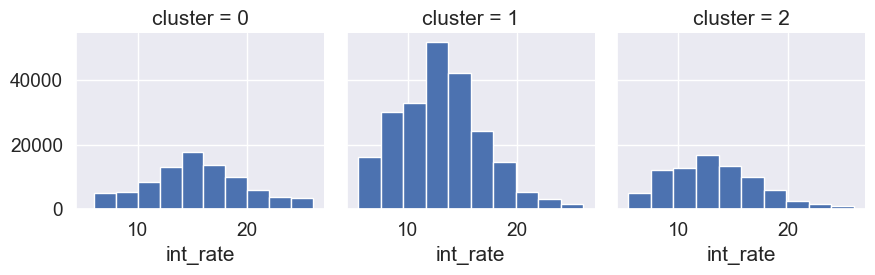

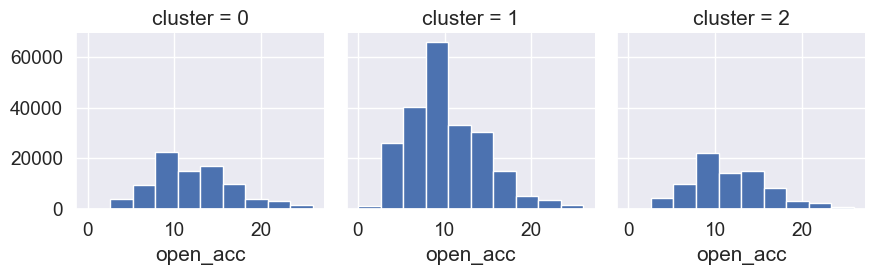

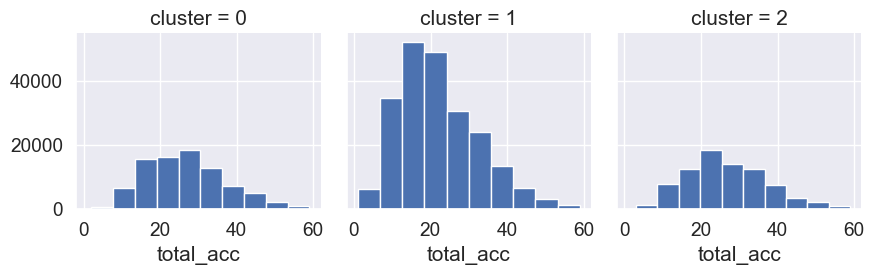

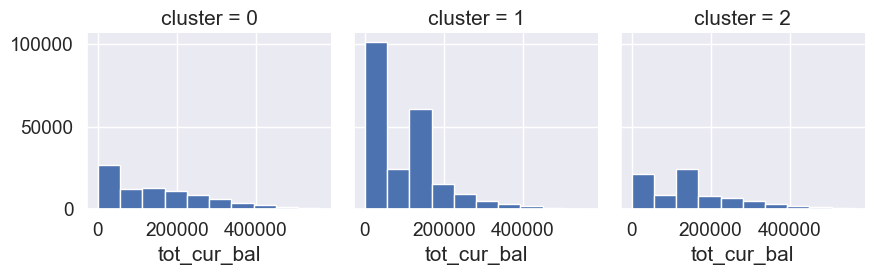

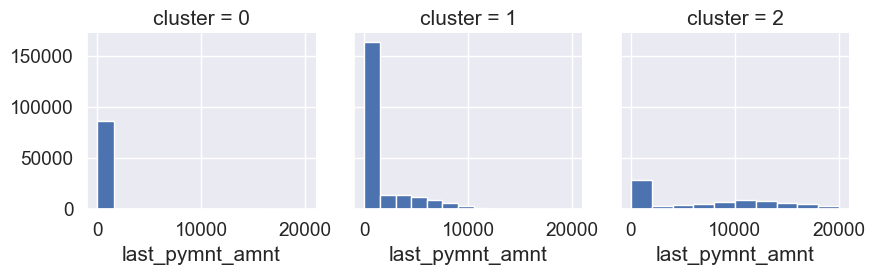

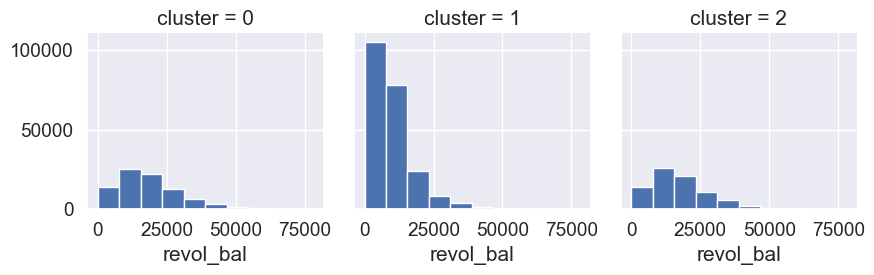

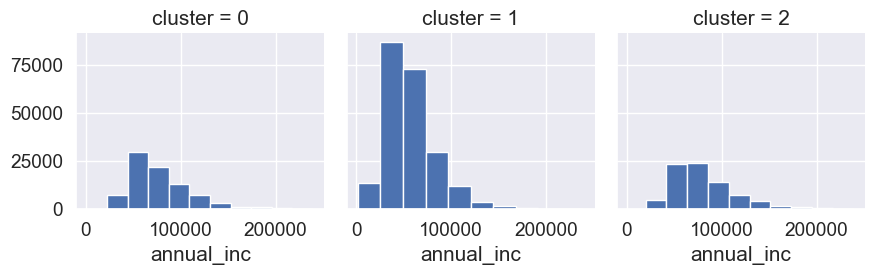

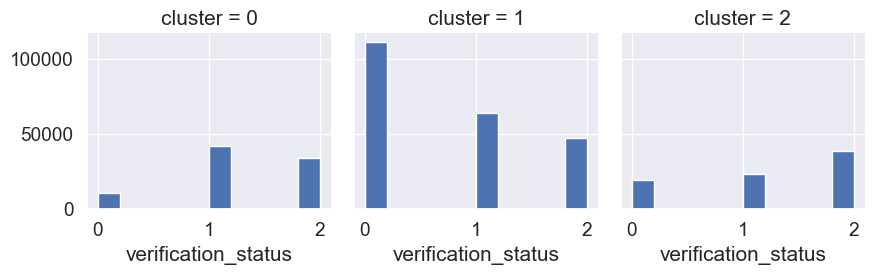

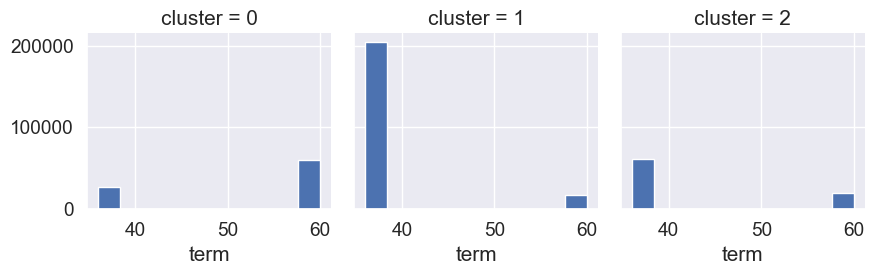

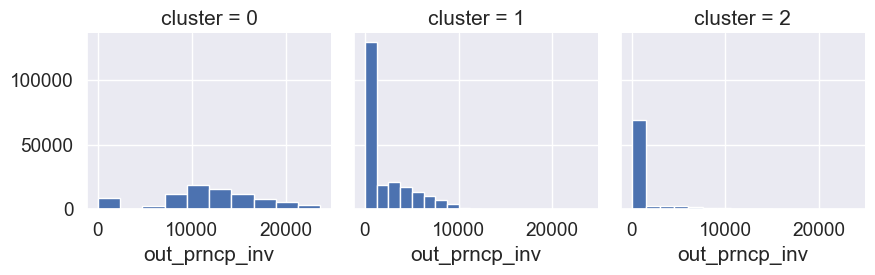

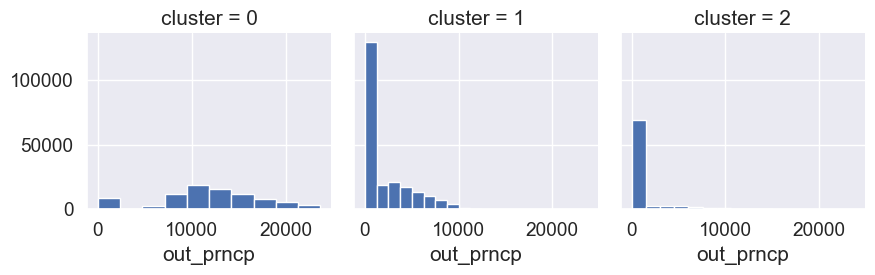

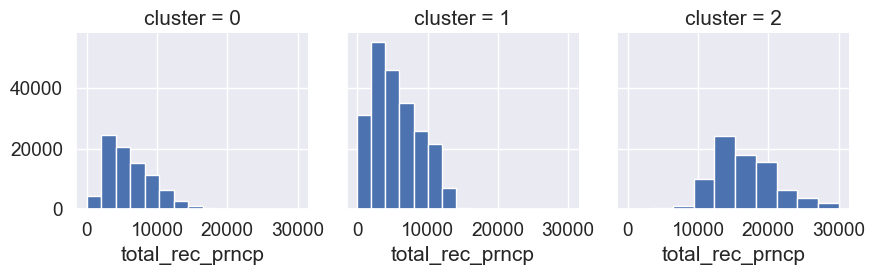

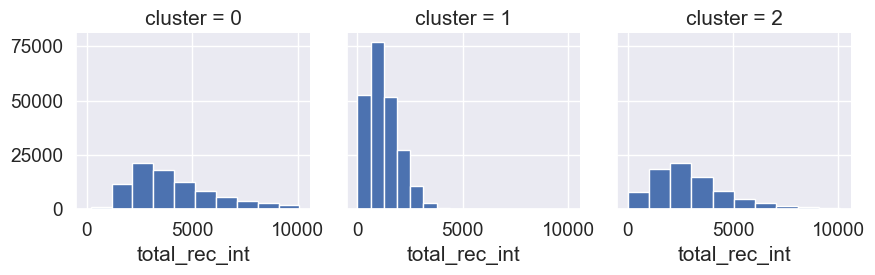

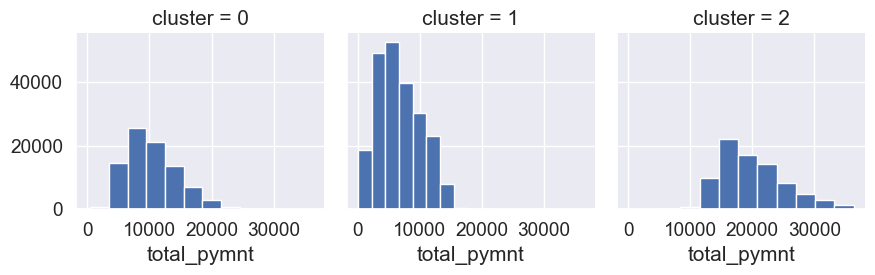

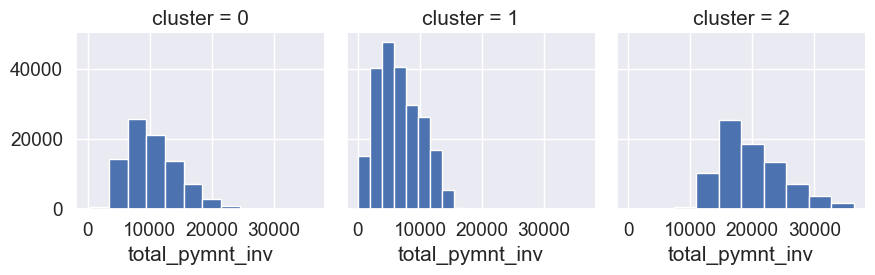

In [43]:
for i in cluster_df.drop(['cluster'],axis=1):
    grid = sns.FacetGrid(cluster_df, col='cluster')
    grid = grid.map(plt.hist, i)
plt.show()

In [44]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [46]:
cluster_df.to_csv("Clustered_Customer_Data_1.csv")

# Training and Testing the Model 

In [47]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390669 entries, 0 to 390668
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            390669 non-null  int64  
 1   installment          390669 non-null  float64
 2   funded_amnt_inv      390669 non-null  float64
 3   grade                390669 non-null  int64  
 4   int_rate             390669 non-null  float64
 5   open_acc             390669 non-null  float64
 6   total_acc            390669 non-null  float64
 7   tot_cur_bal          390669 non-null  float64
 8   last_pymnt_amnt      390669 non-null  float64
 9   revol_bal            390669 non-null  int64  
 10  annual_inc           390669 non-null  float64
 11  verification_status  390669 non-null  int64  
 12  term                 390669 non-null  int64  
 13  out_prncp_inv        390669 non-null  float64
 14  out_prncp            390669 non-null  float64
 15  total_rec_prncp  

In [48]:
# split dataset
X = cluster_df.drop(['cluster'], axis=1)
y = cluster_df[['cluster']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
X_train

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv
147061,27000,602.24,27000.0,2,12.12,13.0,26.0,312784.000000,602.24,13634,80000.0,2,60,12780.81,12780.81,14219.19,7457.16,21676.35,21676.35
128668,4800,176.08,4800.0,4,19.05,7.0,21.0,194094.000000,4671.66,2552,48000.0,0,36,0.00,0.00,4800.00,223.82,5023.82,5023.82
218848,16000,417.17,16000.0,5,19.24,6.0,12.0,25622.000000,417.17,25622,45000.0,1,60,13501.00,13501.00,2499.00,3315.73,5814.73,5814.73
2513,8600,280.13,8600.0,2,10.65,12.0,17.0,138801.713385,4205.77,11000,40000.0,0,36,0.00,0.00,8600.00,1199.68,9799.68,9799.68
313731,10000,330.57,10000.0,2,11.67,9.0,24.0,24741.000000,654.56,15445,60000.0,0,36,5769.43,5769.43,4230.57,1389.12,5619.69,5619.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,12000,396.69,12000.0,2,11.67,4.0,16.0,9903.000000,396.69,9903,103000.0,0,36,7178.10,7178.10,4821.90,1525.14,6347.04,6347.04
365838,6000,186.97,6000.0,1,7.62,8.0,18.0,9958.000000,3357.66,9958,36000.0,0,36,0.00,0.00,6000.00,536.15,6536.15,6536.15
131932,10000,332.72,10000.0,2,12.12,12.0,24.0,46072.000000,332.72,11587,55000.0,1,36,978.19,978.19,9021.81,1957.95,10979.76,10979.76
146867,15000,456.54,14950.0,1,6.03,12.0,30.0,324175.000000,12360.06,21599,80000.0,2,36,0.00,0.00,15000.00,550.15,15550.15,15498.31


In [51]:
X_test

,loan_amnt,installment,funded_amnt_inv,grade,int_rate,open_acc,total_acc,tot_cur_bal,last_pymnt_amnt,revol_bal,annual_inc,verification_status,term,out_prncp_inv,out_prncp,total_rec_prncp,total_rec_int,total_pymnt,total_pymnt_inv
181557,22800,481.75,22550.0,2,9.76,6.0,10.0,138801.713385,481.75,3545,46051.0,2,60,7557.13,7640.71,15159.29,5524.16,20683.45,20456.36
345864,16000,500.65,16000.0,1,7.90,11.0,20.0,354151.000000,500.65,36956,93000.0,0,36,7128.35,7128.35,8871.65,1642.00,10513.65,10513.65
5908,11325,352.33,11300.0,1,7.51,10.0,26.0,138801.713385,3107.53,12170,46700.0,0,36,0.00,0.00,11325.00,1279.13,12604.13,12576.33
226241,7000,239.18,7000.0,3,13.98,8.0,14.0,42530.000000,5607.20,4792,42000.0,2,36,0.00,0.00,7000.00,765.78,7765.78,7765.78
269132,23000,547.05,23000.0,3,14.99,12.0,32.0,273929.000000,547.05,13791,88000.0,1,60,18431.13,18431.13,4568.87,4183.93,8752.80,8752.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99786,14000,339.57,14000.0,3,15.88,11.0,13.0,24713.000000,9806.65,11580,46197.0,2,60,0.00,0.00,14000.00,3956.33,17956.33,17956.33
28595,4300,142.48,4300.0,2,11.83,15.0,32.0,138801.713385,156.71,15050,108000.0,0,36,0.00,0.00,4300.00,826.99,5126.99,5126.99
243487,23300,611.11,23300.0,5,19.52,16.0,37.0,253081.000000,611.11,29220,64000.0,1,60,19392.77,19392.77,3907.23,5259.42,9166.65,9166.65
293334,16000,541.81,15750.0,3,13.35,12.0,25.0,242434.000000,541.81,25006,55000.0,0,36,8656.44,8793.85,7206.15,2546.43,9752.58,9600.20


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

# melakukan prediksi pada data uji 
y_pred = model_LR.predict(X_test)

# Evaluasi model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

# menampilkan hasil output
print('Confusian Matrik: ')
print(confusion_mat)

print('Classification Report:')
print(classification_rep)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusian Matrik: 
[[21141  4612    89]
 [ 8322 45546 13041]
 [   64  6326 18060]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.76     25842
           1       0.81      0.68      0.74     66909
           2       0.58      0.74      0.65     24450

    accuracy                           0.72    117201
   macro avg       0.70      0.75      0.72    117201
weighted avg       0.74      0.72      0.73    117201



In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model dengan hyperparameter yang diinginkan
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2)

# Melatih model
model_DT.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_DT.predict(X_test)

# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil output
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[24116  1517   209]
 [ 2058 63656  1195]
 [  990  1168 22292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     25842
           1       0.96      0.95      0.96     66909
           2       0.94      0.91      0.93     24450

    accuracy                           0.94    117201
   macro avg       0.93      0.93      0.93    117201
weighted avg       0.94      0.94      0.94    117201



In [55]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model dengan hyperparameter yang diinginkan
model_xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=0.8)

# Melatih model
model_xgb.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_xgb.predict(X_test)

# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil output
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[25106   567   169]
 [  387 66256   266]
 [  160   524 23766]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     25842
           1       0.98      0.99      0.99     66909
           2       0.98      0.97      0.98     24450

    accuracy                           0.98    117201
   macro avg       0.98      0.98      0.98    117201
weighted avg       0.98      0.98      0.98    117201



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model dengan hyperparameter yang diinginkan
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2)

# Melatih model
model_RF.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_RF.predict(X_test)

# Evaluasi model
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil output
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

C:\Users\USER\AppData\Local\Temp\ipykernel_6424\3659633822.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(X_train, y_train)


Confusion Matrix:
[[23998  1572   272]
 [ 1147 65201   561]
 [  530  1662 22258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     25842
           1       0.95      0.97      0.96     66909
           2       0.96      0.91      0.94     24450

    accuracy                           0.95    117201
   macro avg       0.95      0.94      0.94    117201
weighted avg       0.95      0.95      0.95    117201



# Saving XGboost model for future prediction

In [58]:
import pickle
filename = 'final_model.sav'
pickle.dump(model_xgb, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuracy')

0.9823124376071877 % Acuracy


# Go to Deploy Model ======== >